In [1]:
import os

from google.colab import drive

INIT=True
PATH="/content"

if INIT:
  drive.mount('/content/drive')
  ! pip install kaggle

  !mkdir ~/.kaggle


  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:

!pip install --upgrade pyarrow pandas



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 82.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you hav

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import polars as pl
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

# Additional check for GPU device name
gpu_device = tf.test.gpu_device_name()
if gpu_device:
    print(f"TensorFlow is using GPU: {gpu_device}")
else:
    print("TensorFlow is not using a GPU")

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is using GPU: /device:GPU:0


In [6]:
! kaggle datasets download -d mpp1998/leap-percentiles-of-full-df
! unzip -o  leap-percentiles-of-full-df.zip -d    leap-percentiles-of-full-df

Dataset URL: https://www.kaggle.com/datasets/mpp1998/leap-percentiles-of-full-df
License(s): unknown
  0% 0.00/2.42M [00:00<?, ?B/s]
100% 2.42M/2.42M [00:00<00:00, 189MB/s]
Archive:  leap-percentiles-of-full-df.zip
  inflating: leap-percentiles-of-full-df/limits_train_percentiles.csv  
  inflating: leap-percentiles-of-full-df/myutils/constants.py  
  inflating: leap-percentiles-of-full-df/myutils/kaggle_metric_utilities.py  
  inflating: leap-percentiles-of-full-df/myutils/metric.py  
  inflating: leap-percentiles-of-full-df/percentiles.pkl  


In [7]:
! kaggle datasets download -d mpp1998/leapdata-minmax-mean-scaler
! unzip -o  leapdata-minmax-mean-scaler.zip -d  leap-nn-data-input

Dataset URL: https://www.kaggle.com/datasets/mpp1998/leapdata-minmax-mean-scaler
License(s): unknown
100% 11.3G/11.4G [02:00<00:00, 101MB/s]
100% 11.4G/11.4G [02:00<00:00, 101MB/s]
Archive:  leapdata-minmax-mean-scaler.zip
  inflating: leap-nn-data-input/df_0_features_1.parquet  
  inflating: leap-nn-data-input/df_0_features_array.npy  
  inflating: leap-nn-data-input/df_0_targets.parquet  
  inflating: leap-nn-data-input/df_10_features_1.parquet  
  inflating: leap-nn-data-input/df_10_features_array.npy  
  inflating: leap-nn-data-input/df_10_targets.parquet  
  inflating: leap-nn-data-input/df_11_features_1.parquet  
  inflating: leap-nn-data-input/df_11_features_array.npy  
  inflating: leap-nn-data-input/df_11_targets.parquet  
  inflating: leap-nn-data-input/df_12_features_1.parquet  
  inflating: leap-nn-data-input/df_12_features_array.npy  
  inflating: leap-nn-data-input/df_12_targets.parquet  
  inflating: leap-nn-data-input/df_13_features_1.parquet  
  inflating: leap-nn-data

In [8]:
df_limits = pd.read_csv("leap-percentiles-of-full-df/limits_train_percentiles.csv",index_col=0)
df_limits.sort_values(by="max") .head(50)

,max,min,q99,q01,std,mean
column,,,,,,
ptend_q0002_12,-2.147357e-53,-2.692638e-38,-1.062446e-48,-5.291556e-39,7.798521e-41,-2.113759e-41
ptend_q0002_6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_17,0.000000e+00,-1.394760e-39,0.000000e+00,-5.596019e-56,1.369964e-43,-3.815392e-46
ptend_q0002_16,0.000000e+00,-1.959202e-44,0.000000e+00,0.000000e+00,1.684660e-48,-5.760587e-51
ptend_q0002_15,0.000000e+00,-6.381237e-48,0.000000e+00,0.000000e+00,3.346434e-52,-9.342572e-55


In [9]:
import tensorflow as tf
import pandas as pd
import glob



In [10]:
indices=[0,]
x1=[]
for i in indices:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1 .append( np.load(file))
x1=np.concatenate(x1,axis=0)
x2=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices],axis=0)
y =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet")for i in indices],axis=0)



In [11]:
x1_val=[]
indices_val=[6,7]
for i in indices_val:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1_val .append( np.load(file))
x1_val=np.concatenate(x1_val,axis=0)
x2_val=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices_val],axis=0)
y_val =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet") for i in indices_val ],axis=0)

x1.shape,x2.shape, y.shape

((246035, 60, 9), (246035, 16), (246035, 368))

In [12]:
dim3_targets =y.shape

In [13]:
x1_test=[]
indices_test=list(range(30,41))
#indices_test=[30,31]
for i in indices_test:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1_test.append( np.load(file))
x1_test=np.concatenate(x1_test,axis=0)
x2_test=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices_test],axis=0)
y_test =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet") for i in indices_test ],axis=0)

x1_test.shape,x2_test.shape, y_test.shape

((2622669, 60, 9), (2622669, 16), (2622669, 368))

In [14]:
y = y.iloc[:,:-8]


In [15]:
y_test = y_test.iloc[:,:-8]
y_val = y_val.iloc[:,:-8]
y.shape, y_test.shape, y_val.shape

((246035, 360), (2622669, 360), (491557, 360))

In [16]:
CFG = {
    'time_mixing_dim':60,
    "feature_mixing_dim":32,
    'encoder_first_dropout':0.05,
    'encoder_second_dropout':0.05,
    'model_num_encoder_layers':1,
    'model_num_lstm_layers':1,
    "lstm_dim": 64,
    "do_time_mixing" : False


}
BATCH_SIZE =1024

In [17]:
import tensorflow as tf
import numpy as np

In [18]:
HACER_PRUEBAS = False
if HACER_PRUEBAS:
    x1 = tf.keras.layers.Dense(8)(np.arange(10).reshape(5, 2))
    x2 =  tf.tile(tf.keras.layers.Dense(8)(np.arange(18, 20).reshape(1, 2)),(5,1))
    tf.reshape(x2,(-1,1))
    x1.shape,x2.shape
    concatted = tf.keras.layers.Concatenate()([x1, x2])
    concatted.shape


In [19]:
CFG = {

    'model_num_heads':3,
    'model_dim':128,
    'model_mha_dropout':0.0,
    'model_first_dropout':0.1,
    'model_encoder_dropout':0.1,
     'model_num_lstm_layers':3,
    'model_num_encoder_layers':5
}

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2


import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=CFG['model_num_heads'], key_dim=CFG['model_dim'], dropout=CFG['model_mha_dropout'])

        self.add = tf.keras.layers.Add()

        self.layernorm = tf.keras.layers.LayerNormalization()

        self.seq = tf.keras.Sequential([tf.keras.layers.Dense(CFG['model_dim'], activation='relu'),
                                        tf.keras.layers.Dropout(CFG['model_encoder_dropout']),
                                        tf.keras.layers.Dense(CFG['model_dim']),
                                        tf.keras.layers.Dropout(CFG['model_encoder_dropout']),
                                       ])

    def call(self, x):
        attn_output = self.mha(query=x, key=x, value=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        x = self.add([x, self.seq(x)])
        x = self.layernorm(x)

        return x


class Encoder(tf.keras.Model):
    def __init__(self):
        super().__init__()

        self.first_linear = tf.keras.layers.Dense(CFG['model_dim'])

        self.add = tf.keras.layers.Add()

        self.first_dropout = tf.keras.layers.Dropout(CFG['model_first_dropout'])

        self.enc_layers = [EncoderLayer() for _ in range(CFG['model_num_encoder_layers'])]

        self.lstm_layers = [tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(CFG['model_dim'], return_sequences=True)) for _ in range(CFG['model_num_lstm_layers'])]



    def call(self, x, training=None):
        x = self.first_linear(x)



        x = self.first_dropout(x)

        for i in range(CFG['model_num_encoder_layers']): x = self.enc_layers[i](x) # (GPU_BATCH_SIZE, CFG['block_size'] // CFG['patch_size'], CFG['fog_model_dim']), Example shape (4, 864, 320)
        for i in range(CFG['model_num_lstm_layers']): x = self.lstm_layers[i](x) # (GPU_BATCH_SIZE, CFG['block_size'] // CFG['patch_size'], CFG['fog_model_dim']*2), Example shape (4, 864, 640)

        return x



class Model (tf.keras.Model):
    def __init__(self):
        super().__init__()

        self.encoder = Encoder()

        self.batchnorm1 = tf. keras.layers.BatchNormalization()
        self.batchnorm2 = tf. keras.layers.BatchNormalization()
        self.batchnorm3 = tf. keras.layers.BatchNormalization()

        self.cnn1=       keras.layers.Conv1D(512, 3, padding='same', activation="relu")
        self.cnn2=       keras.layers.Conv1D(256, 5, padding='same', activation="relu")
        self.cnn3=       keras.layers.Conv1D(128, 7, padding='same', activation="relu")


        self.last_linear = tf.keras.layers.Dense(6)


        self.concatenate = tf.keras.layers.Concatenate()
    def call(self, inputs):
        x1 = inputs[0]
        x2 = inputs[1]
        x = self.concatenate ([x1,tf.tile(tf.reshape(x2,(BATCH_SIZE,1,16)),(1, 60,1))])


        x = self.batchnorm1(self.cnn1(x))
        x = self.batchnorm2(self.cnn2(x))
        x = self.batchnorm3(self.cnn3(x))


        x = self.encoder(x) # (GPU_BATCH_SIZE, CFG['block_size'] // CFG['patch_size'], CFG['fog_model_dim']*2), Example shape (4, 864, 640)
        x = self.last_linear(x) # (GPU_BATCH_SIZE, CFG['block_size'] // CFG['patch_size'], 3), Example shape (4, 864, 3)


        x = tf.reshape(x[:,12:,:],(BATCH_SIZE,60*6-12*6))

        return x

In [21]:
import tensorflow as tf
from sklearn.metrics import r2_score
import keras
from tensorflow.keras.metrics import R2Score
@keras.saving.register_keras_serializable()
def r2_keras(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot)
@keras.saving.register_keras_serializable()
def r2_mult_keras(y_true, y_pred):

    SS_res =  tf.reduce_sum(tf.math.square(y_true - y_pred),axis=0)
    SS_tot = tf.reduce_sum(tf.math.square(y_true - tf.reduce_mean(y_true, axis=0 )),axis=0)
    vals = 1 - SS_res/(SS_tot+0.00000000001)
    vals_clipped = tf.where(vals < 0, tf.zeros_like(vals), vals)


    return     tf.reduce_mean(vals_clipped )

In [22]:
y_train= y.values.reshape(-1,6,60).transpose(0,2,1)[:,12:,:].reshape((-1,360-12*6))
y_train.shape
x2_train =x2.values
x1_train=x1

In [23]:
y_val= y_val.values.reshape(-1,6,60).transpose(0,2,1)[:,12:,:].reshape((-1,360-12*6))
y_val.shape
x2_val =x2_val.values
x1_val=x1_val

In [24]:
y_val.shape,y_train.shape

((491557, 288), (246035, 288))

In [25]:

x2_test=x2_test.values
y_test= y_test.values.reshape(-1,6,60).transpose(0,2,1)[:,12:,:].reshape((-1,360-12*6))


In [26]:
y_train.shape,x2_train.shape,x1_train.shape

((246035, 288), (246035, 16), (246035, 60, 9))

In [27]:
y_val.shape,x2_val.shape,x1_val.shape

((491557, 288), (491557, 16), (491557, 60, 9))

In [28]:
size= x1_train.shape[0]//BATCH_SIZE* BATCH_SIZE
val_size= x1_val.shape[0]//BATCH_SIZE* BATCH_SIZE

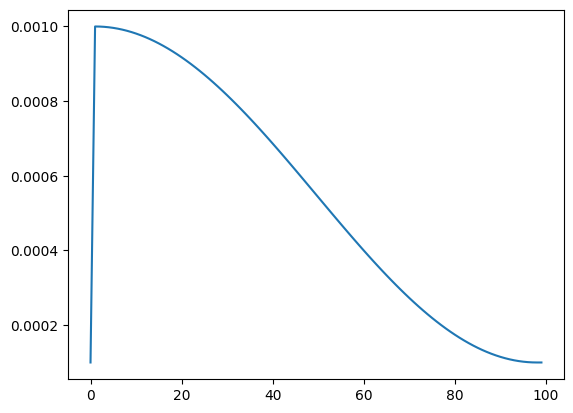

In [29]:
epochs = 100  # 25  # 15  # 12
learning_rate = 1e-3
import matplotlib.pyplot as plt

epochs_warmup = 1
epochs_ending = 2
steps_per_epoch = int(size / BATCH_SIZE)

lr_scheduler = keras.optimizers.schedules.CosineDecay(
    1e-4,
    (epochs - epochs_warmup - epochs_ending) * steps_per_epoch,
    warmup_target=learning_rate,
    warmup_steps=steps_per_epoch * epochs_warmup,
    alpha=0.1
)

plt.plot([lr_scheduler(it) for it in range(0, epochs * steps_per_epoch, steps_per_epoch)])

In [30]:

early_stopping = EarlyStopping(
monitor='r2_mult_keras',
patience=15,
verbose=1,
restore_best_weights=True,
mode='max')

model=Model()
# Compilar el modelo con pérdida MSE
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), loss='mean_squared_error',metrics=[  r2_mult_keras])



In [31]:

import tensorflow as tf
from tensorflow.keras.callbacks import Callback
class SaveBestModelEveryNEpochs(Callback):
    def __init__(self, save_freq, save_path):
        super(SaveBestModelEveryNEpochs, self).__init__()
        self.save_freq = save_freq
        self.save_path =  save_path
        self.best_weights = None
        self.best_epoch = 0
        self.best_val_loss = -1111

    def on_epoch_end(self, epoch, logs=None):


        if (epoch + 1) % self.save_freq == 0:
            print(f"Epoch {epoch+1}: saving model to {self.save_path}")
            self.model.save_weights(self.save_path)

    def on_train_end(self, logs=None):
        if self.best_weights is not None:
           pass

In [32]:
save_best_model_callback = SaveBestModelEveryNEpochs(save_freq=5, save_path=f"drive/MyDrive/leap/keras_models/model_all_data_att_cnn_path.h5")

In [33]:
def create_dataset(x1, x2, y, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(((x1,x2),y.astype(np.float32)))
    dataset = dataset.shuffle(100_000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Assuming x1_train, x2_train, y_train, x1_val, x2_val, y_val are your numpy arrays

train_dataset = create_dataset(x1_train[:size,:,:], x2_train[:size], y_train[:size,:], BATCH_SIZE)
val_dataset = create_dataset(x1_val[:val_size,:,:], x2_val[:val_size], y_val[:val_size,:], BATCH_SIZE)

In [34]:
x1_train.shape,y_train[:size,:].shape

((246035, 60, 9), (245760, 288))

In [35]:
model((x1_train[:BATCH_SIZE,:,:],x2_train[:BATCH_SIZE])).shape

TensorShape([1024, 288])

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  2224000   
                                                                 
 batch_normalization (Batch  multiple                  2048      
 Normalization)                                                  
                                                                 
 batch_normalization_1 (Bat  multiple                  1024      
 chNormalization)                                                
                                                                 
 batch_normalization_2 (Bat  multiple                  512       
 chNormalization)                                                
                                                                 
 conv1d (Conv1D)             multiple                  38912     
                                                             

In [37]:
#model.fit(train_dataset, epochs=300,validation_data=(val_dataset ),batch_size=BATCH_SIZE, callbacks=[early_stopping,save_best_model_callback])

In [38]:
#model.save_weights(f"drive/MyDrive/leap/keras_models/model_all_data_att_cnn_path.h5")

In [39]:
model_loaded=Model()

In [40]:
model_loaded.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error',metrics=[  R2Score(
class_aggregation='uniform_average',
num_regressors=0,
name='r2_score',
dtype=None
),  r2_mult_keras])

In [41]:
model_loaded([x1_train[:BATCH_SIZE,:60,:],x2_train[:BATCH_SIZE]])

<tf.Tensor: shape=(1024, 288), dtype=float32, numpy=
array([[-0.07071859, -0.23059364, -0.09467533, ..., -0.04189584,
         0.0559735 ,  0.02214711],
       [-0.06886584, -0.22017872, -0.09714364, ..., -0.02746307,
         0.0308331 ,  0.00505821],
       [-0.08685344, -0.15310092, -0.21885283, ..., -0.01136342,
        -0.01468381, -0.14916891],
       ...,
       [-0.06367558, -0.2306342 , -0.1012619 , ..., -0.02126585,
         0.01800823,  0.0441278 ],
       [-0.07737824, -0.19605024, -0.08255433, ..., -0.02298648,
        -0.02468613,  0.01512938],
       [-0.05061017, -0.1890947 , -0.08662827, ..., -0.0204741 ,
        -0.03139326,  0.02244638]], dtype=float32)>

In [42]:
model_loaded.load_weights(f"drive/MyDrive/leap/keras_models/model_all_data_att_cnn_path.h5")

In [43]:
# Define padding for each dimension (for dimension 0, 1, and 2)
padding_3d = [[0, x1_test.shape[0]//BATCH_SIZE*BATCH_SIZE + BATCH_SIZE -  x1_test.shape[0]], [0, 0], [0, 0]]  # Add 1 zero at the beginning and 2 zeros at the end of dimension 0
padding_2d =  [[0, x1_test.shape[0]//BATCH_SIZE*BATCH_SIZE + BATCH_SIZE -  x1_test.shape[0]], [0, 0],]
# Add padding to the 3D tensor
x1_test_padded = tf.pad(x1_test, padding_3d, "CONSTANT")
x2_test_padded = tf.pad(x2_test, padding_2d, "CONSTANT")

In [44]:
x1_test_padded.shape,x2_test_padded.shape

(TensorShape([2623488, 60, 9]), TensorShape([2623488, 16]))

In [45]:
tf.__version__

'2.15.0'

In [46]:
import ctypes
import gc
import random
def clear_memory():
    tf.keras.backend.clear_session()  # Clear the Keras session
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    gc.collect()  # Garbage collection
    print("GPU memory cleared.")

In [47]:
clear_memory()

GPU memory cleared.


In [48]:
y_pred = model_loaded.predict([x1_test_padded[:,:,:],x2_test_padded],batch_size=BATCH_SIZE)

2562/2562 [==============================] - 339s 131ms/step


In [49]:
y_pred= y_pred[:y_test.shape[0]]

In [50]:
y_test.shape

(2622669, 288)

In [51]:
scores= []
for i in range(y_test.shape[1]):
  score_=r2_score(y_test[:,i],y_pred[:,i])
  print(score_)
  scores.append(score_)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9980207038800987


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9622763333691188


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-177.35446562107907


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9709027373546879


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7280534095400801


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7185204352358755


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9975898012359369


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9263604789788885


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-429.7199388637148


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9598971811903381


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.780132615139004


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7653280443789829


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9962499900519155


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.07742159798113735


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-405.17967784755893


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7630471594471815


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8033719529188995


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8094597378041616


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9849263790833067


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6380739396518673


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-1898816.461544046


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-0.5799570281401436


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8025033233516848


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8199844270814474


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8659239366748318


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.27788403362079517


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-45507.70244577444


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.35551999196040873


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7609060535164939


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8051922728676802


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.570473183863026


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.23474339801133426


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-653.5650635828188


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5530396943749682


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6938637154336458


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7829937649126559


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.3951735802932126


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.14679847517320077


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-9.141393027591857


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7218331723428816


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.3032994879905023


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.753381380743731


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4019455668279299


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4132604961882478


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8513080655481517


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7246427786912285


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4915987699810588


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7020350799125026


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.49835023044880267


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5007779369396138


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8334433618224739


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7173561982697336


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7052442498795167


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6933753724091132


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5487334680781731


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6437724861164896


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8574128766563994


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6987378098724508


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7063215593074541


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6554760216543773


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6173945560791787


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7333899933518107


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8521684443174606


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6696090348735941


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7035770732597871


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7016666205381078


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6728288248560415


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7897393472105795


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8287495198178504


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6513551713113888


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6889613186850786


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7040673894244143


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7293038926408875


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8257348909674579


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-0.3842459507521596


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6348033818188994


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6585939173245884


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6580183030655593


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7722073790372345


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8486227005246021


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-2.2919954268891756


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6109098905743866


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6352883116559715


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6959746319701711


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8200921967385678


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8596150768029646


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-6.708141512934851


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.585498915657235


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6448637998539986


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6615905339857728


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.852275549974023


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8648351115958665


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


-4.0747386455769865


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5417529236309797


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.637806221625661


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6519295176965741


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8755515729242114


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8617847999763363


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8233862058020491


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.526553588349898


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6152348836224035


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6656846070680686


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8917016292733928


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.857610197194261


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7590402420418378


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5354211352428264


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5994551715063131


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.699490606254338


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8993887646300284


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8505232447923229


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6166660795826135


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5587608416193321


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5716209086047159


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6898980152621088


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9011229393318473


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8267928917967897


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.43364832341696113


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5740441006048163


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5506029851787207


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6843967251202707


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.895755555907944


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7890743777529549


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.41050475249694907


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5686027334256394


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5328842205809969


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6884049976421596


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8871524039422373


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7426669099022514


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.436412441699521


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5731886585747812


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5136876448944246


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6796781689781362


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8747567791489849


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6861652111947376


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4452726375894718


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5781612413964812


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.47627518425714555


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6581350772229255


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8557359694755299


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6279710011266366


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4461437927800679


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5722289407803149


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.49331230316448116


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6611819802092694


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8306577949226795


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5759970235301294


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4414060528681275


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5844920884438811


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5104310159467252


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6510323725898962


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8045204299417634


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5262705062178582


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.43473494651914624


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5835111331466734


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5390391973386561


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.694851763097906


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7729552457900523


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4924915987656424


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.43532743371081317


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5777442133343027


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5487123586150553


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7175717023458428


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.741534976834617


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4517239749751255


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.43578113457359613


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5561048985590453


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5358288115260448


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7215275704207202


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7117205006831825


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4385987100591099


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4340640602041398


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5346135059068269


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5252809427751841


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7212439743709294


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.677791099434963


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.427614247361365


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4352605010056291


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5103364100692815


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.532893329143065


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7155552191105148


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6532985922558163


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.41840133300638105


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4259750995027344


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.49116830648978027


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5343177714112366


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6930534452215842


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6272487236875663


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4125508051023532


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4162715774282475


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4677268468897906


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5309581461091084


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6982908902712142


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6046489162738314


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4092770451597064


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4075227222787907


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4559846627797265


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.562053283493201


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6782809836973571


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5848917805652915


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4095209297553749


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.40501953175252303


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4540366725473942


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5948668444131626


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6938569291072287


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5616947611335745


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.400881437414347


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.404318515485912


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4632454889241039


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.640441246419332


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7030904808642962


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5388853205133926


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.3876097051106957


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4033792320243026


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.48914165937157894


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6772054269942309


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7257166354938773


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5199657116042345


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.37708364151629925


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.40230696660324483


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5232345181202015


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7273726631682522


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7465949642078689


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5044658264322115


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.36867528678583805


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.39552701384025457


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5681436484936525


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.774588597901893


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7648962862757371


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.49617070243698247


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.36983755458755196


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.38523806939425165


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6128740814976807


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8224595935113965


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7951867583087027


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4932155966533234


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.37690073259925105


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.3852744268963335


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6574252034853737


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8564910110622475


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8211350105412563


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.49575533542739947


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.390995208731135


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.3846397958300145


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7002126358401523


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8697973594297969


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8586344612228668


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5020824115630603


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4172419071353979


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.3954096878630947


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7397083289713804


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8662587288193273


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8840880202288902


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5064063844857337


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4452041594743671


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.44208921287648606


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7765164947779395


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8597867803404773


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8975592566393916


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5168697908698366


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.469554327412542


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5298569564444009


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8105867285001969


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8758859817964788


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9048393880120111


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5349296572799271


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5179397180291404


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.632283094753722


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8439695475346749


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8970705700251308


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9045504334035535


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.549944797765372


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5443981035709173


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7407529754818627


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8705642364431798


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8924779636241763


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8994004698447674


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6055720173144417


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6066931993216724


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8236808555200016


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8829164176377375


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8711835846190122


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8895514748224996


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7869939858030718


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.616725251476522


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.85371540980336


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.901283582233567


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9523863595866068


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9527010834700746


In [52]:
scores =np.array(scores).reshape(48,6)

In [53]:
np.mean(scores )

-6756.3726421188685

In [54]:
with open("drive/MyDrive/scores_att2.npy","wb") as file:
  np.save(file,scores)


In [55]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'